<a href="https://colab.research.google.com/github/angelinebj/ML2/blob/main/SVM_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [12]:
# 1. Cargando el dataset de iris y haciendo el split 70/30

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# Estandarización de las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# 2.
# Implementación SVM con un kernel lineal
clf_linear = SVC(kernel='linear', random_state=1)
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)

In [15]:
# Implementación SVM con un kernel poly
clf_poly = SVC(kernel='poly', random_state=1)
clf_poly.fit(X_train, y_train)
y_pred_poly = clf_poly.predict(X_test)

In [16]:
# Implementación SVM con un kernel rbf
clf_rbf = SVC(kernel='rbf', random_state=1)
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

In [18]:
# accuracy, precision, recall y f1-score para el modelo svm con un kernel lineal
results={}
results['linear'] = {
'accuracy': accuracy_score(y_test, y_pred_linear),
'precision': precision_score(y_test, y_pred_linear, average='weighted'),
'recall': recall_score(y_test, y_pred_linear, average='weighted'),
'f1': f1_score(y_test, y_pred_linear, average='weighted'),
'confusion_matrix': confusion_matrix(y_test, y_pred_linear)
}

In [19]:
# accuracy, precision, recall y f1-score para el modelo svm con un kernel poly
results['poly'] = {
'accuracy': accuracy_score(y_test, y_pred_poly),
'precision': precision_score(y_test, y_pred_poly, average='weighted'),
'recall': recall_score(y_test, y_pred_poly, average='weighted'),
'f1': f1_score(y_test, y_pred_poly, average='weighted'),
'confusion_matrix': confusion_matrix(y_test, y_pred_poly)
}

In [20]:
# accuracy, precision, recall y f1-score para el modelo svm con un kernel lineal
results['rbf'] = {
'accuracy': accuracy_score(y_test, y_pred_rbf),
'precision': precision_score(y_test, y_pred_rbf, average='weighted'),
'recall': recall_score(y_test, y_pred_rbf, average='weighted'),
'f1': f1_score(y_test, y_pred_rbf, average='weighted'),
'confusion_matrix': confusion_matrix(y_test, y_pred_rbf)
}

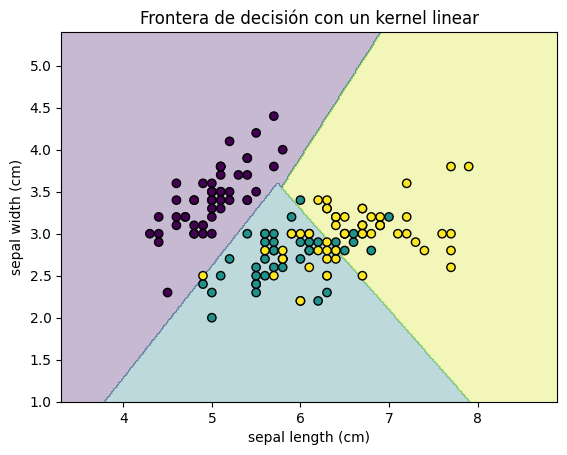

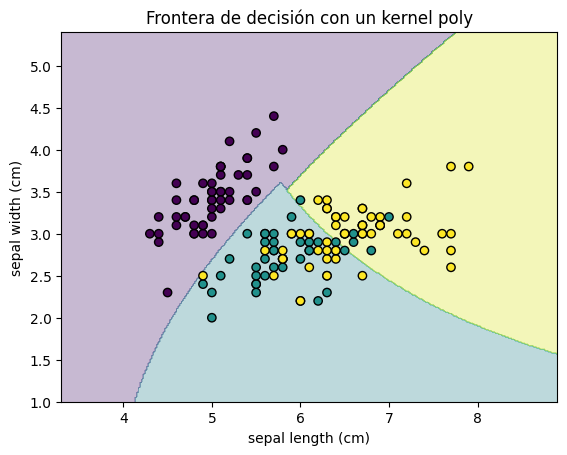

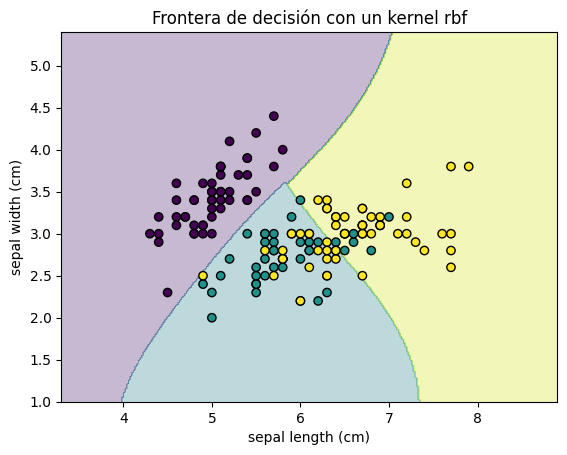

In [22]:
# 4. fronteras de decisión
def plot_decision_boundary(X, y, kernel, feature_indices=(0, 1)):
    X_plot = X[:, feature_indices]
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_plot, y, test_size=0.3, random_state=42, stratify=y)

    clf = SVC(kernel=kernel, gamma='auto')
    clf.fit(X_train_p, y_train_p)

    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis)
    plt.title(f"Frontera de decisión con un kernel {kernel}")
    plt.xlabel(iris.feature_names[feature_indices[0]])
    plt.ylabel(iris.feature_names[feature_indices[1]])
    plt.show()

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    plot_decision_boundary(X, y, kernel)

In [31]:
# 5. Mejores hiperparámetros usando GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print("Mejores hiperparámetros:", best_params)

best_model = grid.best_estimator_ #ajustando el modelo con los mejores hiperparámetros
y_pred_best = best_model.predict(X_test)

Mejores hiperparámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


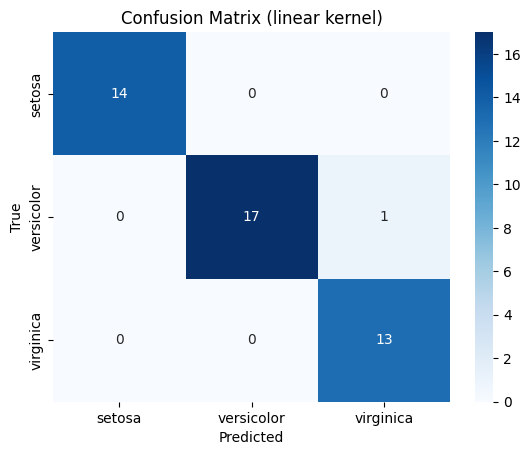

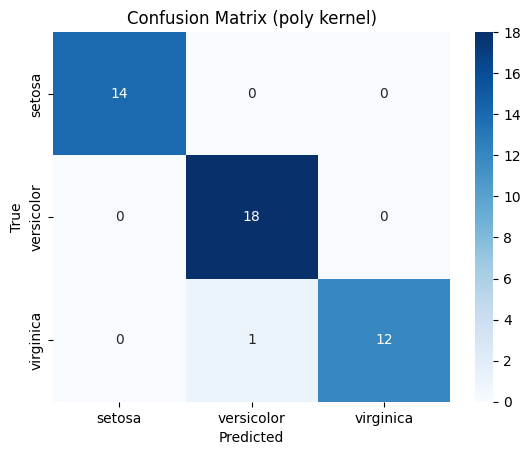

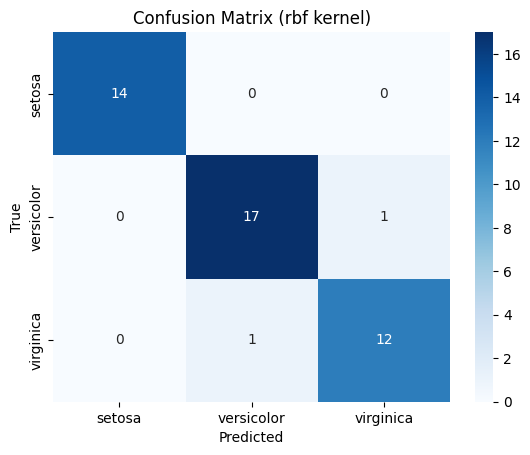

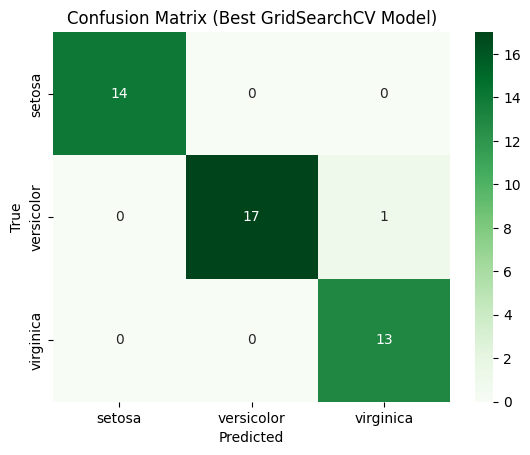

In [33]:
# 6. Matrices de confusión para cada kernel
for kernel in kernels:
    cm = results[kernel]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix ({kernel} kernel)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Best model confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (Best GridSearchCV Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [34]:
# 7. Analysis report
print("Performance comparison:")
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    for metric, value in metrics.items():
        if metric != 'confusion_matrix':
            print(f"  {metric}: {value:.4f}")

print("\nBest model parameters (GridSearchCV):", grid.best_params_)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

Performance comparison:

Kernel: linear
  accuracy: 0.9778
  precision: 0.9794
  recall: 0.9778
  f1: 0.9779

Kernel: poly
  accuracy: 0.9778
  precision: 0.9789
  recall: 0.9778
  f1: 0.9776

Kernel: rbf
  accuracy: 0.9556
  precision: 0.9556
  recall: 0.9556
  f1: 0.9556

Best model parameters (GridSearchCV): {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for Best Model:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

